 Feature                 | Description                                                  |
|------------------------|--------------------------------------------------------------|
| Call Failures          | Number of call failures                                      |
| Complains              | Binary (0: No complaint, 1: Complaint)                        |
| Subscription Length    | Total months of subscription                                 |
| Charge Amount          | Ordinal attribute (0: Lowest amount, 9: Highest amount)      |
| Seconds of Use         | Total seconds of calls                                       |
| Frequency of Use       | Total number of calls                                        |
| Frequency of SMS       | Total number of text messages                                |
| Distinct Called Numbers| Total number of distinct phone calls                         |
| Age Group              | Ordinal attribute (1: Younger age, 5: Older age)             |
| Tariff Plan            | Binary (1: Pay as you go, 2: Contractual)                    |
| Status                 | Binary (1: Active, 2: Non-active)                            |
| Churn                  | Binary (1: Churn, 0: Non-churn) – Class label                |
| Customer Value         | The calculated value of the customer            

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Gathering

In [2]:
# Load a dataset
df = pd.read_csv('IranianTelecom_Classification.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [4]:
print(df.shape)
df.columns

(3150, 14)


Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

## 2. Data Understanding & Exploration

### 2.1 Missing Values

In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


### 2.2 Summery Statistics

In [6]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


## 3. Data Cleaning & Preprocessing

### 3.1 Updating Column Names for consistency

In [7]:
# Rename columns names to be more descriptive and readable

df = df.rename(columns={"Call  Failure" : "Failure_Calls_Total",
                        "Complains" : "Complaint_Flag",
                        "Subscription  Length": "Tenure",
                        "Charge  Amount" : "Charge_Rank",
                        "Seconds of Use" : "Call_Total_Seconds",
                        "Frequency of use" : "Calls_Total" ,
                        "Frequency of SMS" : "SMS_Total",
                        "Distinct Called Numbers" : "Distinct_Called_No_Total",
                        "Age Group" : "Age_Rank",
                        "Tariff Plan" : "Tariff_Plan",
                        "Status" : "Active_Status",
                        "Age" : "Age_Customer",
                        "Customer Value" : "Customer_LTV"
               })

### 3.2 Removing duiplicate rows

In [8]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 300


In [9]:
df = df.drop_duplicates()

In [10]:
print(df.shape)

(2850, 14)


### 3.3 Fix Inconsistent Data Entries

In [11]:
# Loop through columns to get unique values from all columns
for column in df.columns:
    unique_values = sorted(df[column].unique(), reverse=False)
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Failure_Calls_Total': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Unique values in column 'Complaint_Flag': [0, 1]
Unique values in column 'Tenure': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
Unique values in column 'Charge_Rank': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Unique values in column 'Call_Total_Seconds': [0, 8, 13, 33, 50, 60, 73, 80, 88, 93, 100, 110, 115, 128, 133, 148, 165, 180, 190, 193, 205, 210, 213, 215, 223, 245, 248, 258, 260, 263, 273, 275, 280, 290, 293, 295, 300, 305, 313, 315, 318, 323, 325, 335, 338, 345, 355, 365, 378, 380, 383, 385, 390, 393, 395, 398, 403, 405, 415, 418, 420, 428, 433, 438, 440, 450, 453, 455, 460, 465, 470, 472, 475, 485, 490, 495, 498, 503, 508, 510, 513, 515, 518, 520, 528, 530, 535, 538, 550, 553

### 3.4 Handle Missing Values

In [12]:
df.isnull().sum().sort_values(ascending=False)

Failure_Calls_Total         0
Complaint_Flag              0
Tenure                      0
Charge_Rank                 0
Call_Total_Seconds          0
Calls_Total                 0
SMS_Total                   0
Distinct_Called_No_Total    0
Age_Rank                    0
Tariff_Plan                 0
Active_Status               0
Age_Customer                0
Customer_LTV                0
Churn                       0
dtype: int64

### 3.5 Convert Data Types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Failure_Calls_Total       2850 non-null   int64  
 1   Complaint_Flag            2850 non-null   int64  
 2   Tenure                    2850 non-null   int64  
 3   Charge_Rank               2850 non-null   int64  
 4   Call_Total_Seconds        2850 non-null   int64  
 5   Calls_Total               2850 non-null   int64  
 6   SMS_Total                 2850 non-null   int64  
 7   Distinct_Called_No_Total  2850 non-null   int64  
 8   Age_Rank                  2850 non-null   int64  
 9   Tariff_Plan               2850 non-null   int64  
 10  Active_Status             2850 non-null   int64  
 11  Age_Customer              2850 non-null   int64  
 12  Customer_LTV              2850 non-null   float64
 13  Churn                     2850 non-null   int64  
dtypes: float64(1)

### 3.6 Encode categorical variables so their values start from 0

In [14]:
# Convert original categories to start from 0
df['Age_Rank'] = df['Age_Rank'].replace({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
df['Tariff_Plan']= df['Tariff_Plan'].replace({1:0,2:1})
df['Active_Status']= df['Active_Status'].replace({2:0})

## 4. Feature Engineering

## 4.1 Create Derived Features

In [15]:
# Group the tenure in bins of 12 months
# <=12 =1, <24= =2, <=36 =3. <=48 =4, the rest=5

def assign_tenure_group(tenure):
  if tenure <= 12:
    return '1'
  elif tenure <= 24:
    return '2'
  elif tenure <= 36:
    return '3'
  elif tenure <= 48:
    return '4'
  else:
    return '5'

# create a new 'tenure_group' column
df['Tenure_Group'] = df['Tenure'].apply(assign_tenure_group)

# datatype to be int64
df['Tenure_Group'] = df['Tenure_Group'].astype('int64')


### 3.7 Identify Categorial and Numerical Features

In [16]:
categorical_features= [ "Charge_Rank", "Age_Rank", "Tariff_Plan", "Tenure_Group", "Complaint_Flag", "Active_Status"]
numerical_features = [ "Failure_Calls_Total", "Customer_LTV", "Call_Total_Seconds", "Calls_Total", "SMS_Total", "Distinct_Called_No_Total"]
target = "Churn"

In [17]:
# Create a readable label for churn status
df['Churn_Label'] = df[target].map({0: 'No Churn', 1: 'Churn'})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Failure_Calls_Total       2850 non-null   int64  
 1   Complaint_Flag            2850 non-null   int64  
 2   Tenure                    2850 non-null   int64  
 3   Charge_Rank               2850 non-null   int64  
 4   Call_Total_Seconds        2850 non-null   int64  
 5   Calls_Total               2850 non-null   int64  
 6   SMS_Total                 2850 non-null   int64  
 7   Distinct_Called_No_Total  2850 non-null   int64  
 8   Age_Rank                  2850 non-null   int64  
 9   Tariff_Plan               2850 non-null   int64  
 10  Active_Status             2850 non-null   int64  
 11  Age_Customer              2850 non-null   int64  
 12  Customer_LTV              2850 non-null   float64
 13  Churn                     2850 non-null   int64  
 14  Tenure_Group 

## 5. Exploratory Data Analysis (EDA)

### 5.1 Univariate Analysis -- Categorical Features

c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

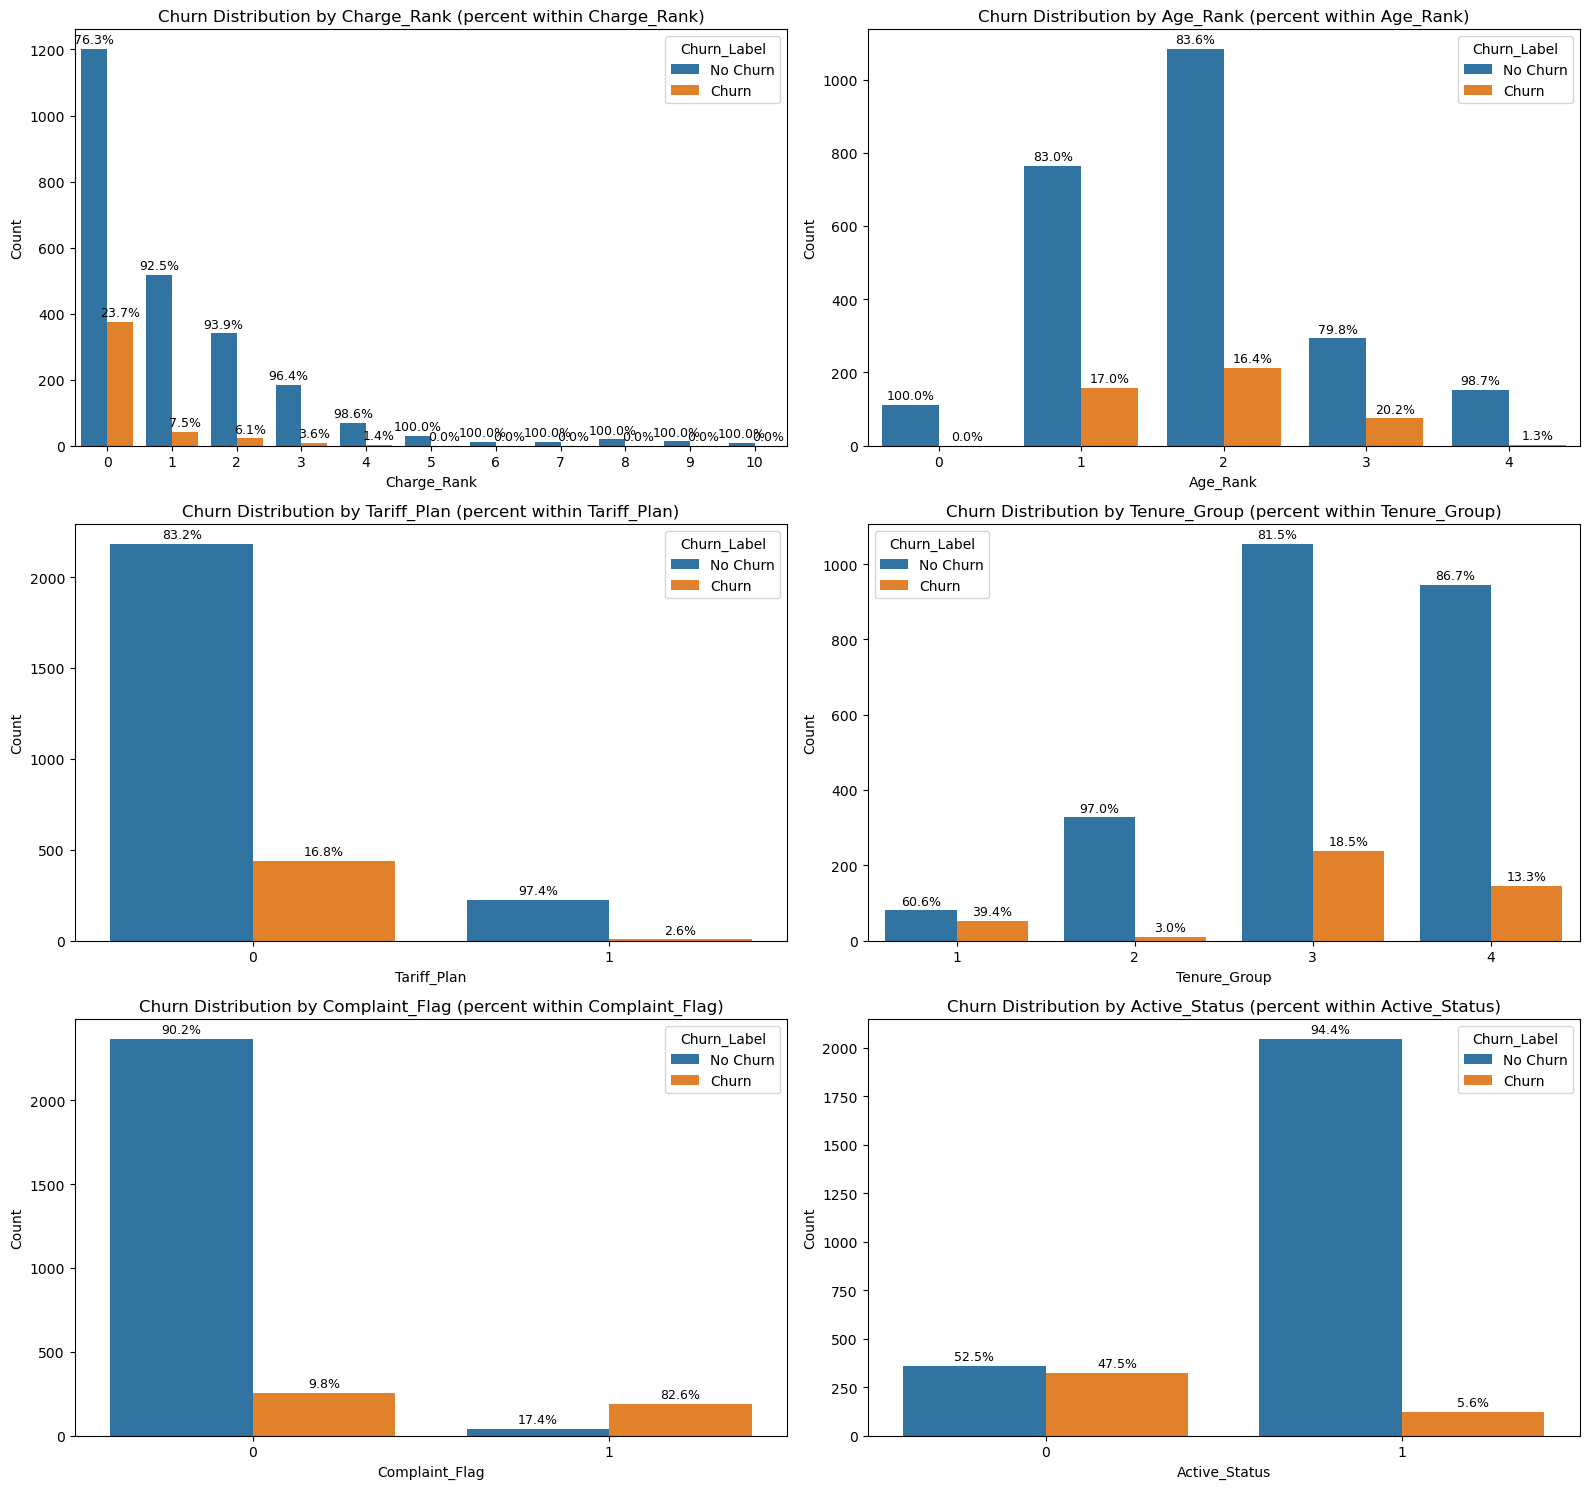

In [19]:
def countplot_with_pct_per_category(df, x, hue, ax=None, order=None, hue_order=None,
                                    fmt='{:.1f}%'):
    """Countplot with percentages computed within each x category."""
    if ax is None:
        ax = plt.gca()

    # Draw the countplot
    ax = sns.countplot(data=df, x=x, hue=hue, order=order, hue_order=hue_order, ax=ax)

    # Precompute totals per x category (denominators)
    totals = df.groupby(x, dropna=False).size()

    # Grab tick locations and labels to map bar x-position -> category label
    ticklocs = np.array([t.get_position()[0] if hasattr(t, "get_position") else t
                         for t in ax.get_xticks()])
    ticklabels = [t.get_text() for t in ax.get_xticklabels()]

    # Helper to coerce text label back to original dtype key in `totals`
    # (handles ints, floats, strings, categoricals)
    def coerce_label(lbl):
        # Try to match exact label first
        if lbl in totals.index:
            return lbl
        # Try numeric coercions if possible
        for caster in (int, float):
            try:
                v = caster(lbl)
                if v in totals.index:
                    return v
            except Exception:
                pass
        return lbl  # fall back

    # Build mapping: x-position -> category key used in `totals`
    pos2cat = {}
    for pos, lbl in zip(ticklocs, ticklabels):
        pos2cat[pos] = coerce_label(lbl)

    # Annotate each bar with % within its category
    for p in ax.patches:
        # bar center x
        cx = p.get_x() + p.get_width()/2
        # find closest tick location
        idx = np.argmin(np.abs(ticklocs - cx))
        cat = pos2cat[ticklocs[idx]]

        count = p.get_height()
        denom = totals.get(cat, 0)
        pct = (count / denom * 100) if denom else 0.0

        ax.annotate(fmt.format(pct),
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=9, color='black',
                    xytext=(0, 2), textcoords='offset points')

    return ax

# ---- Use it for your grid of categorical features ----
n_cat = len(categorical_features)
rows = (n_cat + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(16, 5*rows))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    ax = axes[i]
    countplot_with_pct_per_category(df, x=col, hue='Churn_Label', ax=ax)
    ax.set_title(f'Churn Distribution by {col} (percent within {col})')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Summary: Age rank 1, 2, and 3 with charge rank 0, and mostly pay-as-you-go customers will start churn in tenure group 1, 3 and 4. 83% of the users who raise a complaint can be churn.

c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

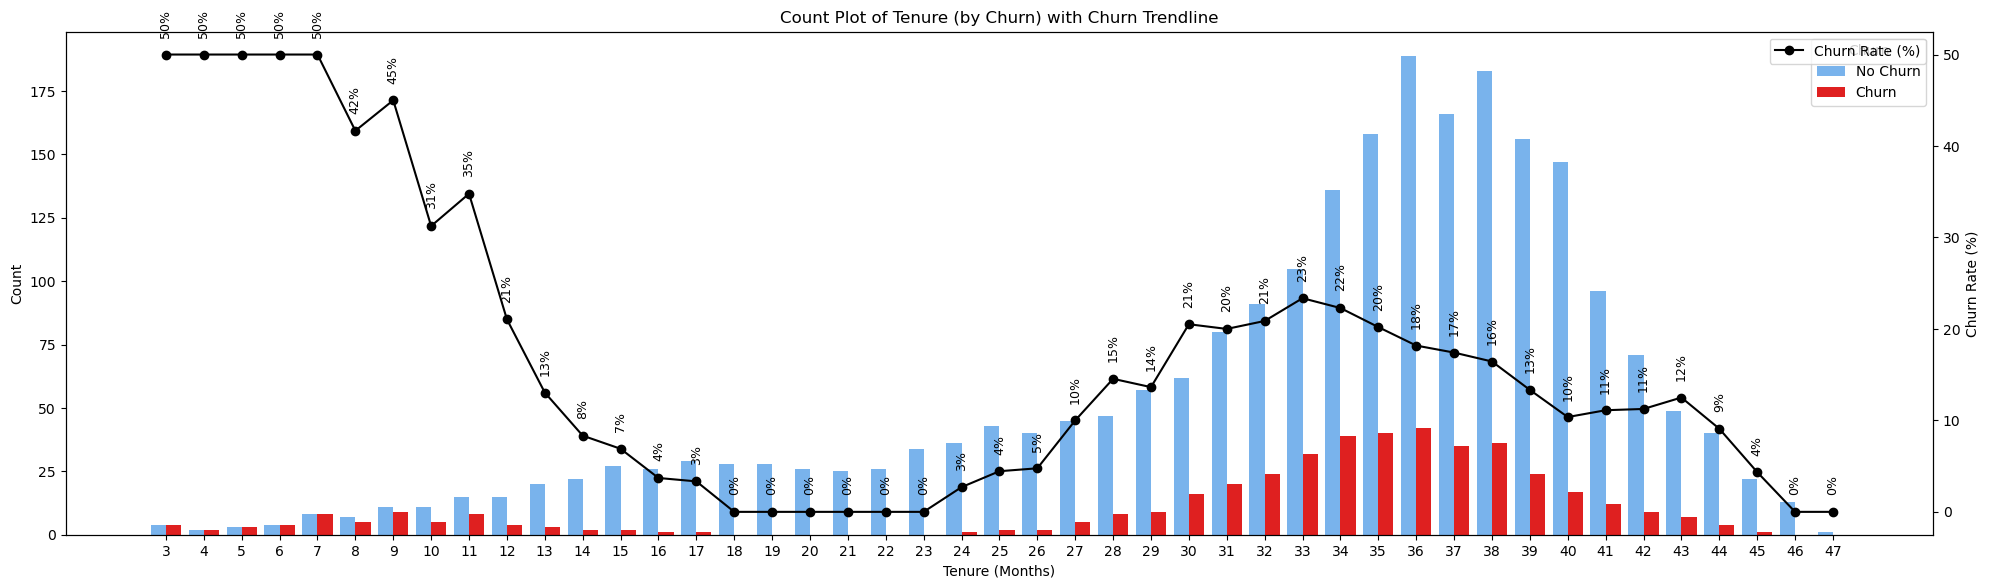

In [29]:
# Count plot of Tenure, colored by Churn_Label, with churn trendline and integer value labels
plt.figure(figsize=(20,6))
ax = sns.countplot(data=df, x='Tenure', hue='Churn_Label', palette=['#66b3ff', '#ff0000'])
plt.title('Count Plot of Tenure (by Churn) with Churn Trendline')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.legend(title='Churn')

# Calculate churn rate per tenure
churn_rate = df.groupby('Tenure')['Churn'].mean() * 100

# Match churn_rate with countplot positions
x_positions = range(len(churn_rate.index))  # numerical positions of Tenure bars

# Overlay churn rate as a line plot (secondary y-axis)
ax2 = ax.twinx()
line, = ax2.plot(x_positions, churn_rate.values, color='black', marker='o', linestyle='-', label='Churn Rate (%)')
ax2.set_ylabel('Churn Rate (%)', color='black')
ax2.legend(loc='upper right')

# Add vertical integer value labels to the trendline points
for x, y in zip(x_positions, churn_rate.values):
    ax2.annotate(f'{int(round(y))}%', (x, y), textcoords="offset points", xytext=(0,12), 
                 ha='center', va='bottom', fontsize=9, color='black', rotation=90)

# Ensure x-ticks match Tenure values
ax.set_xticks(x_positions)
ax.set_xticklabels(churn_rate.index)

plt.tight_layout()
plt.show()


c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


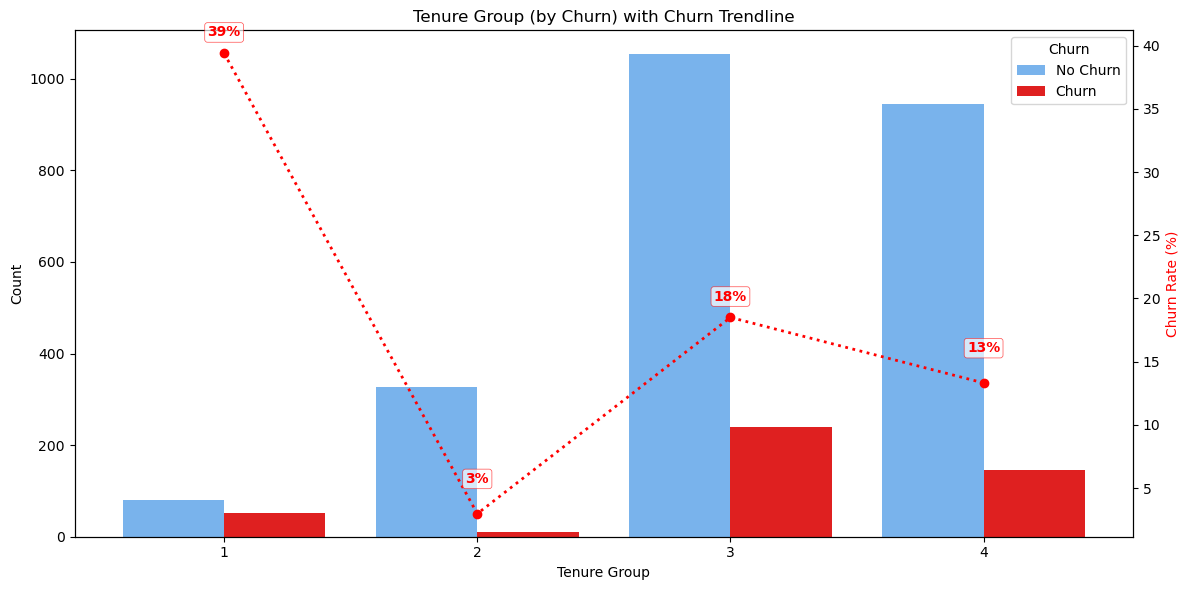

In [21]:
# --- choose and lock the category order ---
cat_order = sorted(pd.Series(df["Tenure_Group"]).dropna().unique().tolist())
# if they are strings you can convert to int for sorting, then back to str if you like

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='Tenure_Group', hue='Churn_Label',
                   order=cat_order, palette=['#66b3ff', '#ff0000'])
ax.set_title('Tenure Group (by Churn) with Churn Trendline')
ax.set_xlabel('Tenure Group')
ax.set_ylabel('Count')
ax.legend(title='Churn')

# --- churn rate per tenure group in the SAME order as the bars ---
churn_rate = (
    df.groupby('Tenure_Group')["Churn"]  # Churn must be 0/1
      .mean()
      .reindex(cat_order) * 100
)

# --- plot the trendline at the bar x-positions as a dotted line ---
xpos = ax.get_xticks()  # positions used by the countplot categories
ax2 = ax.twinx()
ax2.plot(xpos, churn_rate.values, color='red', marker='o', linestyle=':', linewidth=2, label='Churn Rate (%)')
ax2.set_ylabel('Churn Rate (%)', color='red')

# annotate percentages above each point, stagger vertically for visibility
for i, (x, y) in enumerate(zip(xpos, churn_rate.values)):
    offset = 10 + (i % 2) * 10  # stagger every other label
    ax2.annotate(f'{int(round(y))}%', (x, y),
                 textcoords="offset points", xytext=(0, offset),
                 ha='center', va='bottom', fontsize=10, color='red', weight='bold', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='red', lw=0.5, alpha=0.7))

plt.tight_layout()
plt.show()

#### 📊 Tenure Group Strategy for Churn Prevention

#### 🔴 Group 1: The Danger Zone
- **Churn Risk**: Up to 40% of customers
- **Focus Areas**:
  - Improve onboarding experience
  - Strengthen first impressions
  - Boost early engagement strategies
- **Goal**: Prevent immediate drop-offs

---

#### 🟢 Group 2: The Safest Zone
- **Churn Risk**: Low
- **Focus Areas**:
  - Upselling and cross-selling opportunities
  - Loyalty perks and rewards
- **Goal**: Deepen customer attachment and lifetime value

---

#### 🟡 Group 3: Renewal Risk
- **Churn Risk**: Moderate
- **Focus Areas**:
  - Customer satisfaction programs
  - Periodic check-ins
  - Renewal incentives
- **Goal**: Reduce churn during contract or subscription renewal phase

---

#### 🔵 Group 4: Long-Term Customers
- **Churn Risk**: Still present, but lower
- **Focus Areas**:
  - Exclusive benefits
  - Recognition programs
  - VIP treatment
- **Goal**: Nurture loyalty and retain high-value customers

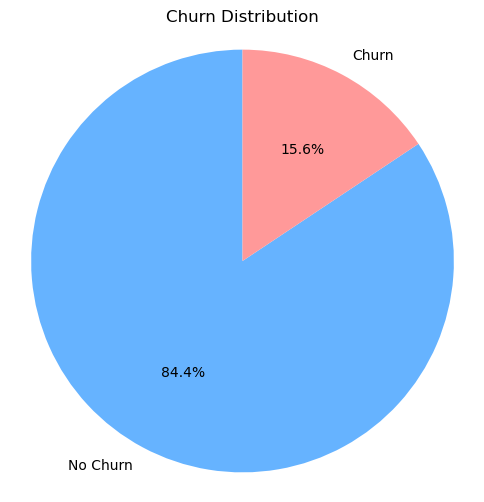

In [22]:
# Pie chart for Churn (target) distribution
churn_counts = df[target].value_counts()
labels = ['No Churn', 'Churn'] if 0 in churn_counts.index else churn_counts.index.astype(str)
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

### 5.2 Univariate Analysis -- Numercial Features

c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

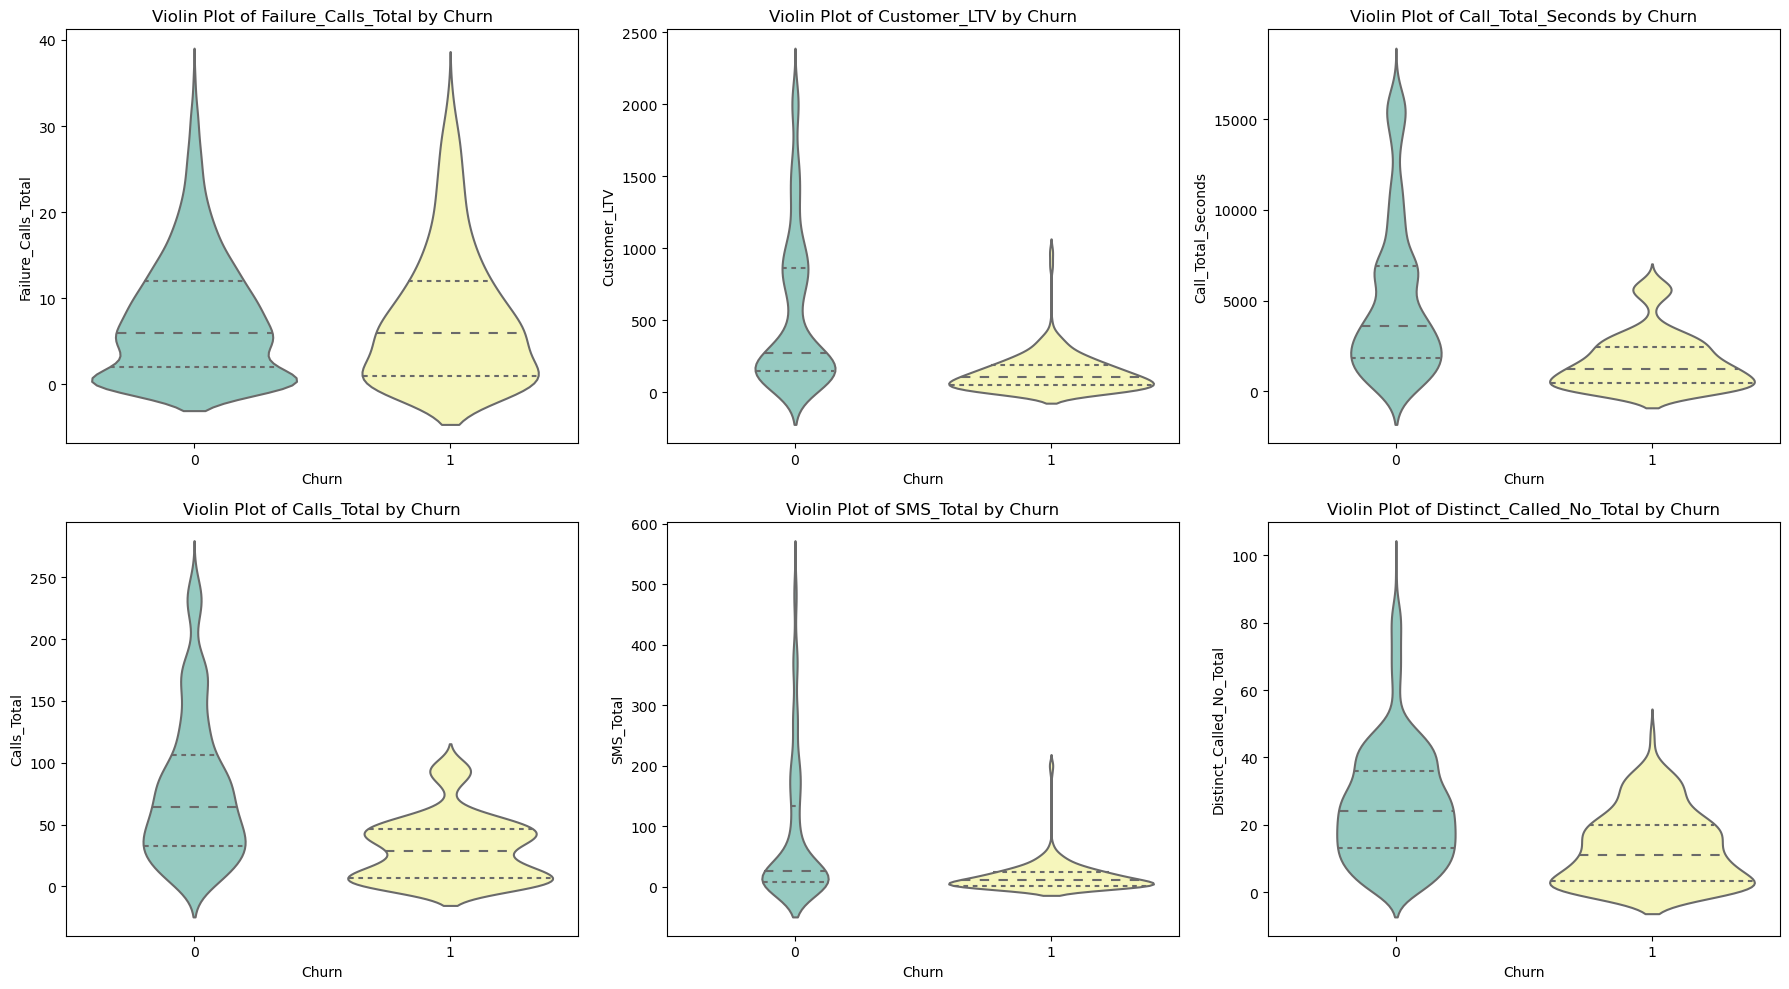

In [24]:
# Violin plots for numerical features by churn status
num_cols = len(numerical_features)
nrows = (num_cols + 2) // 3
fig, axes = plt.subplots(nrows, 3, figsize=(18, 5 * nrows))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.violinplot(data=df, x=target, y=col, ax=axes[i], palette='Set3', inner='quartile')
    axes[i].set_title(f'Violin Plot of {col} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

#### Summary: Customers who use more phone call (more distinct no. and longer phone call) are more unlikely to churn.

In [ ]:
# Mean, highest, and lowest Customer_LTV for churned customers
churned_customers = df[df[target] == 1]
mean_ltv = churned_customers['Customer_LTV'].mean()
max_ltv = churned_customers['Customer_LTV'].max()
min_ltv = churned_customers['Customer_LTV'].min()
print(f"Mean Customer_LTV for churned customers: {mean_ltv:.2f}")
print(f"Highest Customer_LTV for churned customers: {max_ltv}")
print(f"Lowest Customer_LTV for churned customers: {min_ltv}")

Mean Customer_LTV for churned customers: 132.18
Highest Customer_LTV for churned customers: 987.255
Lowest Customer_LTV for churned customers: 0.0


c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

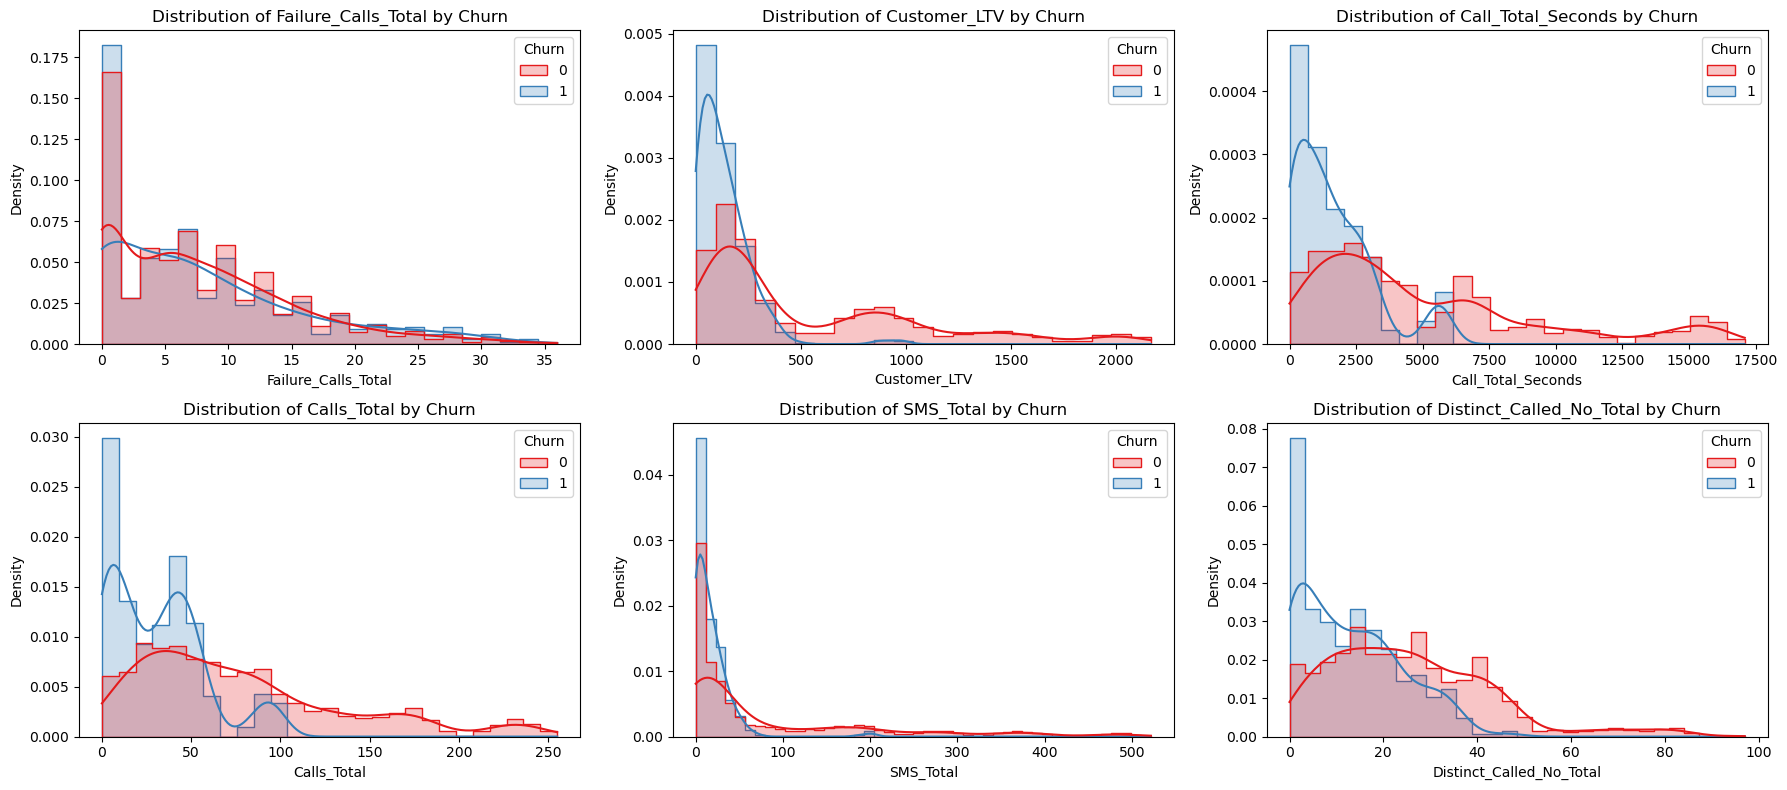

In [ ]:
# Create a grid of distribution plots for each numerical variable with hue='Churn'
num_cols = len(numerical_features)
nrows = (num_cols + 2) // 3
fig, axes = plt.subplots(nrows, 3, figsize=(18, 4 * nrows))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, hue='Churn', kde=True, ax=axes[i], palette='Set1', element='step', stat='density', common_norm=False)
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

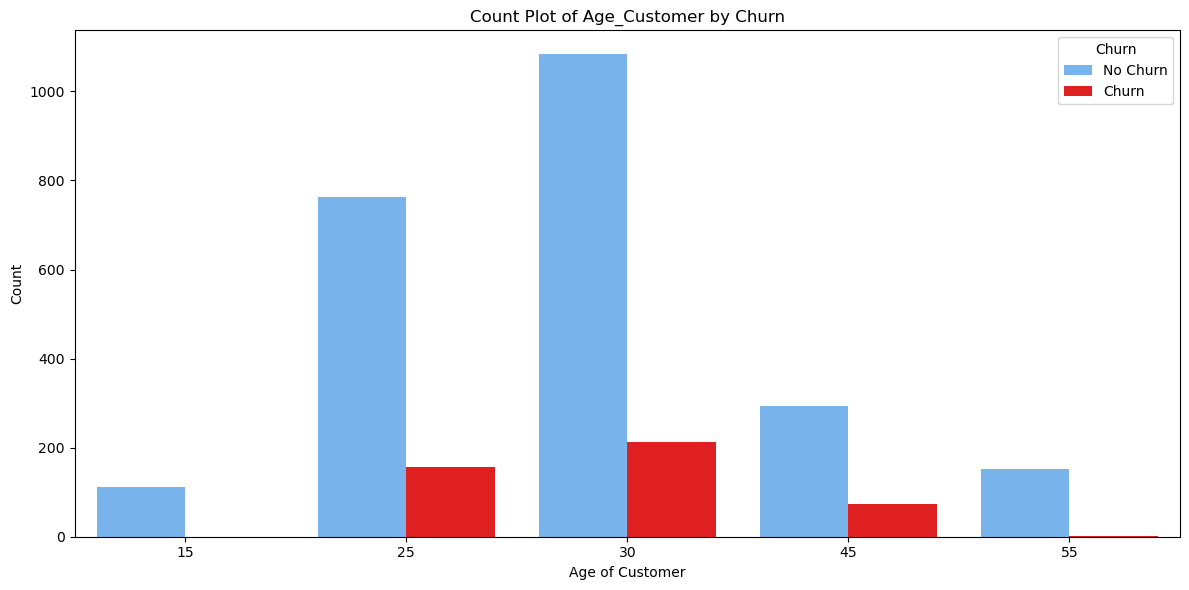

In [28]:
# Count plot for Age_Customer with hue=Churn_Label
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Age_Customer', hue='Churn_Label', palette=['#66b3ff', '#ff0000'])
plt.title('Count Plot of Age_Customer by Churn')
plt.xlabel('Age of Customer')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### Feature Importance Analysis -- Numerical features


In [ ]:
df.head()

,Failure_Calls_Total,Complaint_Flag,Tenure,Charge_Rank,Call_Total_Seconds,Calls_Total,SMS_Total,Distinct_Called_No_Total,Age_Rank,Tariff_Plan,Active_Status,Age_Customer,Customer_LTV,Churn,Tenure_Group,Churn_Label
0,8,0,38,0,4370,71,5,17,2,0,1,30,197.640,0,4,No Churn
1,0,0,39,0,318,5,7,4,1,0,0,25,46.035,0,4,No Churn
2,10,0,37,0,2453,60,359,24,2,0,1,30,1536.520,0,4,No Churn
3,10,0,38,0,4198,66,1,35,0,0,1,15,240.020,0,4,No Churn
4,3,0,38,0,2393,58,2,33,0,0,1,15,145.805,0,4,No Churn


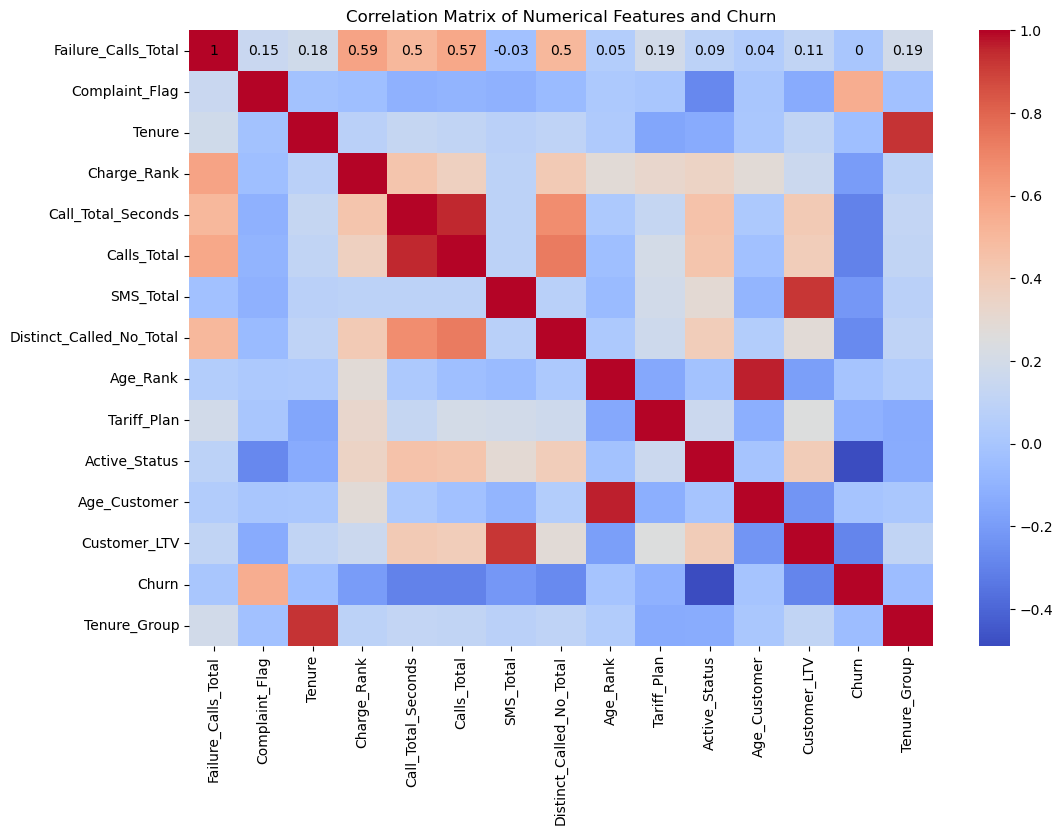

In [ ]:
# Correlation matrix for all numerical features in the DataFrame, excluding 'Churn_Label'
corr_matrix = df.drop(columns=['Churn_Label'], errors='ignore').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix.round(2), 
    annot=True, 
    cmap='coolwarm', 
    annot_kws={"size": 10, "color": "black"}  # bigger font & black text
)
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

## Hypothesis Testing

### One-way ANOVA

In [ ]:
# One-way ANOVA: Does Customer_LTV differ by Tenure_Group?
from scipy.stats import f_oneway
anova_groups = [df[df['Tenure_Group'] == g]['Customer_LTV'] for g in sorted(df['Tenure_Group'].unique())]
f_stat, p_value = f_oneway(*anova_groups)
print(f"One-way ANOVA F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print('Result: Significant difference in Customer_LTV between at least two Tenure Groups (p < 0.05)')
else:
    print('Result: No significant difference in Customer_LTV between Tenure Groups (p >= 0.05)')

One-way ANOVA F-statistic: 18.97
p-value: 0.0000
Result: Significant difference in Customer_LTV between at least two Tenure Groups (p < 0.05)


##### Tukey's HSD (post-hoc test)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2 -168.8546 0.0069 -303.3712 -34.3381   True
     1      3  -37.8406 0.8486 -157.5499  81.8687  False
     1      4   59.8773 0.5791  -60.8618 180.6165  False
     2      3   131.014 0.0002   50.8821 211.1459   True
     2      4   228.732    0.0  147.0696 310.3943   True
     3      4    97.718    0.0   43.8258 151.6101   True
--------------------------------------------------------


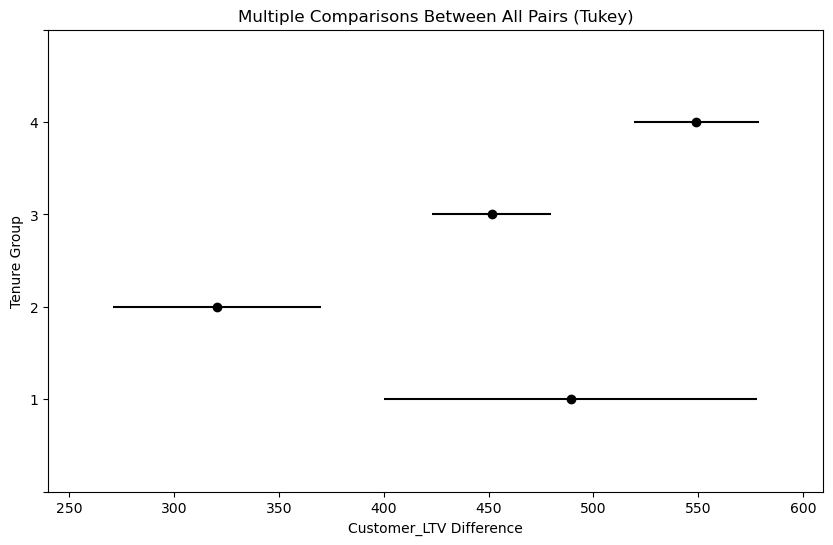

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

# Run Tukey's HSD test
tukey = pairwise_tukeyhsd(
    endog=df['Customer_LTV'],       # dependent variable
    groups=df['Tenure_Group'],      # independent variable (groups)
    alpha=0.05                      # significance level
)

# Print summary
print(tukey)

# Optional: plot the confidence intervals for group differences
import matplotlib.pyplot as plt
tukey.plot_simultaneous(comparison_name=None, xlabel="Customer_LTV Difference", ylabel="Tenure Group")
plt.show()

#### Tukey HSD Post-Hoc Test Summary

##### Pairwise Comparisons
- **Group 2 > Group 1** ✅ Significant  
- **Group 2 > Group 3** ✅ Significant  
- **Group 2 > Group 4** ✅ Significant  
- **Group 3 > Group 4** ✅ Significant  
- **Group 1 vs Group 3** ❌ Not significant  
- **Group 1 vs Group 4** ❌ Not significant  

---

##### Overall Insights
- **Group 2 (Mid-tenure customers)** → Consistently higher Customer_LTV than Groups 1, 3, and 4.  
- **Group 4 (Long-tenure customers)** → Consistently lower than Groups 2 and 3, but not different from Group 1.  
- **Group 1 (Newest customers)** → Lower than Group 2 but not significantly different from Groups 3 or 4.  
- **Group 3 (Medium-long tenure)** → Middle ground: higher than Group 4 but lower than Group 2.  

---

##### Conclusion
Customer value **peaks during mid-tenure (Group 2)** and **declines in long-tenure customers (Group 4)**, with Groups 1 and 3 sitting between.

### Chi-square test (Charge_Rank vs Tariff_Plan)

In [30]:
# Chi-square test between Charge_Rank and Tariff_Plan
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Charge_Rank'], df['Tariff_Plan'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square Statistic:', chi2)
print('Degrees of Freedom:', dof)
print('p-value:', p)
if p < 0.05:
    print('Result: Significant association between Charge_Rank and Tariff_Plan (p < 0.05)')
else:
    print('Result: No significant association between Charge_Rank and Tariff_Plan (p >= 0.05)')

Chi-square Statistic: 388.99202184821615
Degrees of Freedom: 10
p-value: 2.0694965407691022e-77
Result: Significant association between Charge_Rank and Tariff_Plan (p < 0.05)


In [31]:
# Calculate standardized residuals
residuals = (contingency_table - expected) / np.sqrt(expected)
residuals_df = pd.DataFrame(residuals, index=contingency_table.index, columns=contingency_table.columns)
print(residuals_df)

Tariff_Plan         0          1
Charge_Rank                     
0            2.195375  -7.427190
1            0.040406  -0.136698
2           -0.543299   1.838039
3           -1.322437   4.473947
4           -3.038032  10.277988
5           -2.967972  10.040966
6           -1.294144   4.378229
7           -0.311795   1.054837
8           -0.830919   2.811087
9           -1.433175   4.848586
10          -1.354840   4.583571


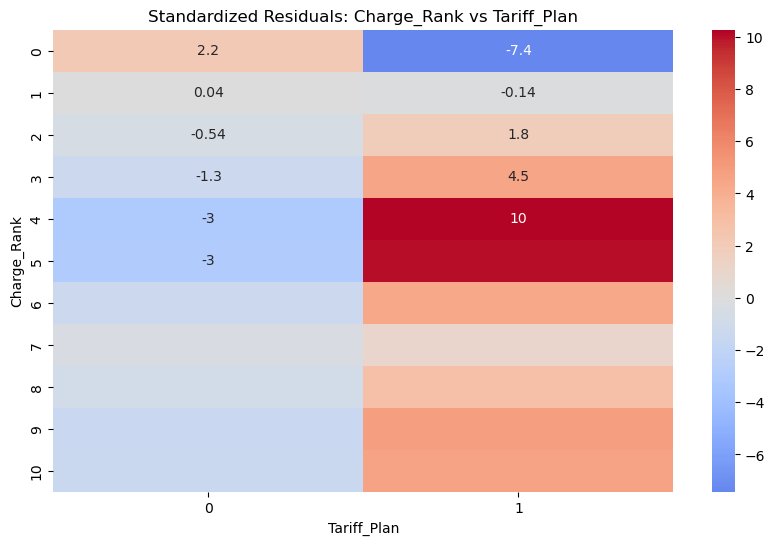

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(residuals_df, annot=True, cmap="coolwarm", center=0)
plt.title("Standardized Residuals: Charge_Rank vs Tariff_Plan")
plt.show()

#### Charge_Rank 4 and 5 are strongly associated with Tariff_Plan 1 (very high positive residuals).
#### Charge_Rank 0 is strongly underrepresented in Tariff_Plan 1 (very negative residual).
#### Charge_Rank 6, 9, 10 also show moderate positive association with Tariff_Plan 1.


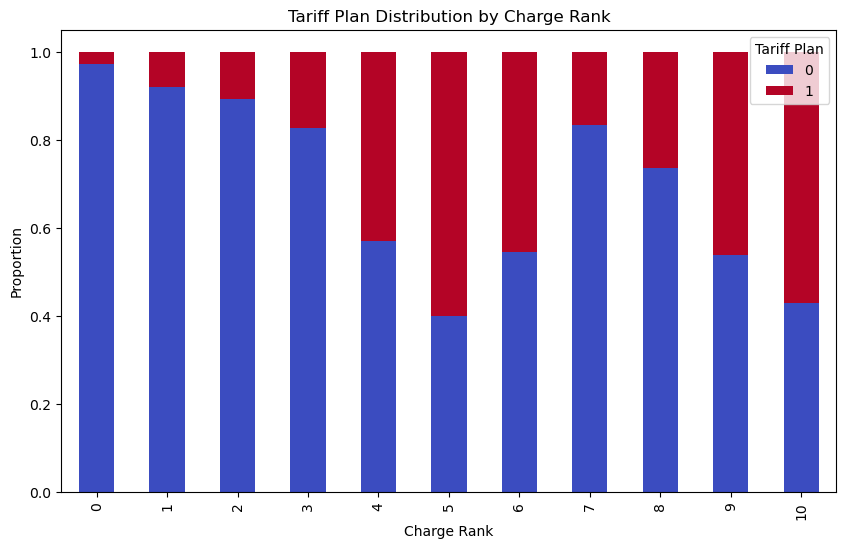

In [34]:
pd.crosstab(df['Charge_Rank'], df['Tariff_Plan'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm'
)
plt.title("Tariff Plan Distribution by Charge Rank")
plt.ylabel("Proportion")
plt.xlabel("Charge Rank")
plt.legend(title="Tariff Plan")
plt.show()